# Lab 7, Chi2 fit of data

## import libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn ##don't have to use
from tqdm import tqdm
% matplotlib inline

## Load the data, and check the plot

In [86]:
##load default data
x, y, y_err = np.loadtxt("mydata.csv", delimiter=',', unpack=True)
#x, y, y_err = np.loadtxt("Lumi_data.txt", delimiter=',', unpack=True)
y_err = y_err * 3

In [87]:
# ##creat your own data
# datasize = 15
# x = np.linspace(0, 10, datasize)
# y = x**2 * 0.1 + x * 3.2 + 0.6
# y += np.random.normal(0, 1, datasize)
# y_err = np.random.normal(0, 1, datasize)
# #print(x, y, y_err)

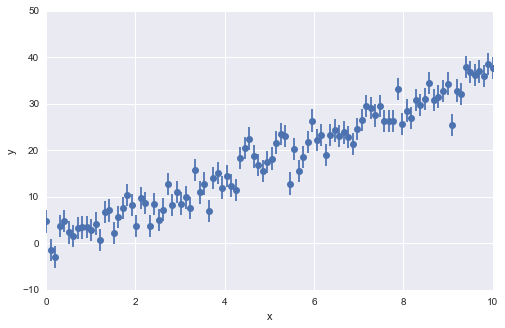

In [88]:
plt.clf()
plt.figure(figsize=[8, 5])
#plt.plot(x, y)
#plt.plot(x,y,"o")
plt.errorbar(x, y, yerr=y_err, linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

('no error:', array([ 3.67617159, -0.27690708]), array([[ 0.00869664, -0.04348322],
       [-0.04348322,  0.29135229]]))
('with error', array([ 3.67617157, -0.27690703]), array([[ 0.00869665, -0.04348325],
       [-0.04348325,  0.29135235]]), array([ 0.09325584,  0.53977065]))


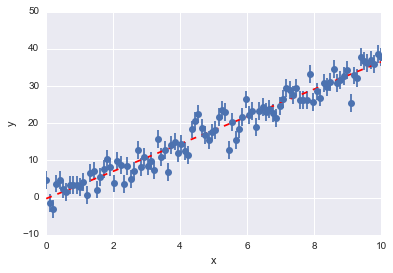

In [89]:
from scipy.optimize import curve_fit
def model(x, a, b):
    return a * x + b
popt, pcov = curve_fit(model, x, y)
print("no error:", popt, pcov)
popt, pcov = curve_fit(model, x, y, sigma=y_err)
print("with error", popt, pcov, np.sqrt(np.diag(pcov)))
plt.plot(x, model(x, *popt), 'r--', label='fit-with-bounds')
plt.errorbar(x, y, yerr=y_err, linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [90]:
def calc_chi2(y, y_err, f, ndof):
    chi2 = (y-f)**2/y_err**2
    chi2 = np.sum(chi2)/(len(y)- ndof)
    return chi2

In [91]:
def model(x, a, b):
    return a * x + b

In [92]:
step_size = 50

a_p = np.linspace(3, 4, 50)
b_p = np.linspace(-1, 1, 50)
##for the lumi data
#a_p = np.linspace(5E-3, 7E-3, 50)
#b_p = np.linspace(5E6, 5E7, 50)

chi2out = np.zeros([50, 50])
for i, a in enumerate(a_p):
    for j, b in enumerate(b_p):
        chi2out[i, j] = calc_chi2(y, y_err, model(x, a, b), 2)
        #print(chi2out[i, j])

a_minpos, b_minpos = np.unravel_index(chi2out.argmin(), chi2out.shape)

(3.6734693877551021, -0.26530612244897966, 'chi2', 1.2836252986854271)


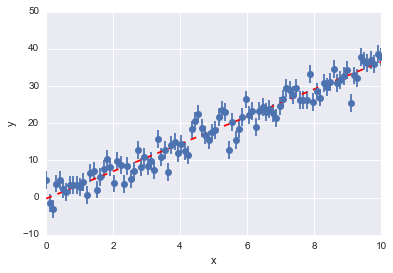

In [93]:
print( a_p[a_minpos], b_p[b_minpos] , "chi2", chi2out[a_minpos, b_minpos])
plt.plot(x, model(x, a_p[a_minpos], b_p[b_minpos]), 'r--', label='fit-with-bounds')
plt.errorbar(x, y, yerr=y_err, linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [94]:
A, B = np.meshgrid(a_p, b_p)

<IPython.core.display.Javascript object>


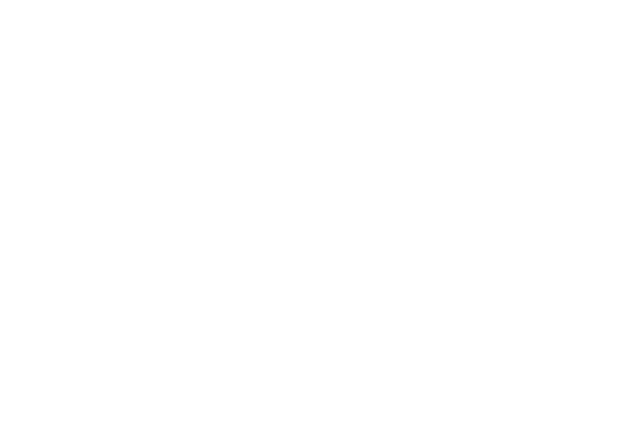

<IPython.core.display.Javascript object>


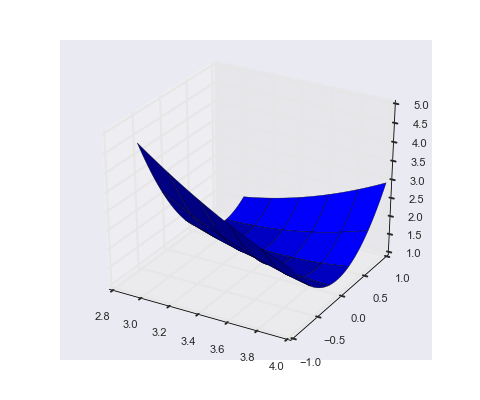

In [103]:
%matplotlib notebook
plt.clf()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[6, 5])
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A, B, chi2out)
plt.show()

In [12]:
# % matplotlib inline
# plt.clf()
# plt.contour(A, B, chi2out)
# plt.show()

(3.6734693877551021, -0.26530612244897966, 'chi2', 1.2836252986854271)


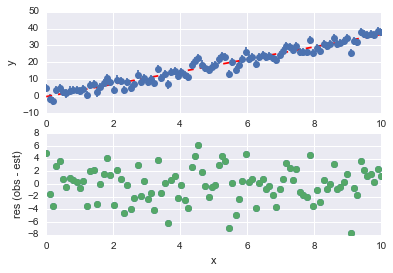

In [104]:
% matplotlib inline
plt.clf()
plt.subplot(2, 1, 1)
print( a_p[a_minpos], b_p[b_minpos] , "chi2", chi2out[a_minpos, b_minpos])
plt.plot(x, model(x, a_p[a_minpos], b_p[b_minpos]), 'r--', label='fit-with-bounds')
plt.errorbar(x, y, yerr=y_err, linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 1, 2)
plt.plot(x, y - model(x, a_p[a_minpos], b_p[b_minpos]), 'o', label='fit-with-bounds')
plt.errorbar(x, y - model(x, a_p[a_minpos], b_p[b_minpos]), linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("res (obs - est)")
plt.show()

### Check Residue Distribution

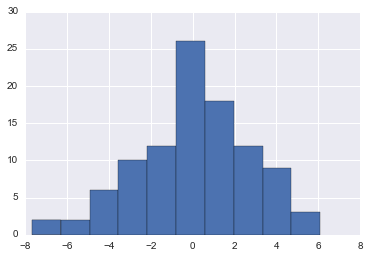

In [97]:
plt.clf()
plt.hist(y - model(x, a_p[a_minpos], b_p[b_minpos]))
plt.show()

## Chi2 distribution, generate MC

100%|██████████| 100/100 [00:03<00:00, 31.28it/s]


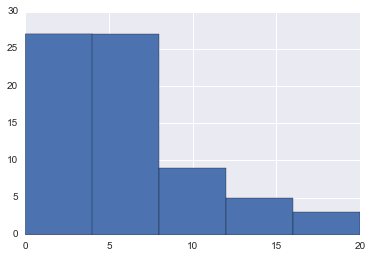

In [15]:
##The distribution of chi2
n_trial = 100
chidist = []
for n in tqdm(range(n_trial)):
    ##creat your own data
    datasize = 15
    x = np.linspace(0, 10, datasize)
    #y = x**2 * 0.1 + x * 3.2 + 0.6
    ##this is the linear model
    y = x * 3.2 + 0.6
    ##add noise
    y += np.random.normal(0, 1, datasize)
    ##set random error
    y_err = np.random.normal(0, 1, datasize)
    #print(x, y, y_err)
    
    ##repeat the fit
    step_size = 50
    a_p = np.linspace(3, 4, step_size)
    b_p = np.linspace(-1, 1, step_size)

    chi2out = np.zeros([step_size, step_size])
    for i, a in enumerate(a_p):
        for j, b in enumerate(b_p):
            chi2out[i, j] = calc_chi2(y, y_err, model(x, a, b), 2)
            #print(chi2out[i, j])

    a_minpos, b_minpos = np.unravel_index(chi2out.argmin(), chi2out.shape)
    chi2out[a_minpos, b_minpos]
    chidist.append(chi2out[a_minpos, b_minpos])
    
plt.clf()
plt.hist(chidist, bins=np.linspace(0, 20, 6))
plt.show()

## Generate Higgs Data
### It is, exponential background with gaussian noise + Gaussian signal
### Possion uncertainty is used
### Datasets are generated -- you don't have to run this but it is good to see what's done

In [33]:
np.random.seed(42)

(1000909.0909090909, -1.0)
(1000909.0909090909, -1.0, 'chi2', 0.15262410858726111)


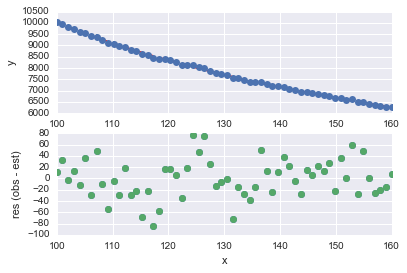

In [71]:
##creat your own data
datasize = 60
Ntotal = 1000000 * 1
x = np.linspace(100, 160, datasize)
#y = x**2 * 0.1 + x * 3.2 + 0.6
##this is now an exponential
y = Ntotal * (x ** (-1) )
##add noise
y += np.random.normal(0, np.sqrt(np.sqrt(Ntotal)), datasize)
##inject signal
def norm(x, mu, sigma, N):
    return N * np.exp(-( (x-mu)**2 / ( 2.0 * sigma**2 ) ) )
y += norm(x, 125, 1, Ntotal/10000)
##set pisson error
y_err = np.sqrt(y)
#print(x, y, y_err)
#print(np.stack((x, y, y_err), axis=-1))
np.savetxt("Higgs_1000000.csv", np.stack((x, y, y_err), axis=-1), delimiter=",")

def model(x, a, b):
    return a * (x ** (b))

##repeat the fit
step_size = 100
a_p = np.linspace(Ntotal *0.99, Ntotal * 1.01, step_size)
b_p = np.linspace(-1, 1, step_size)

chi2out = np.zeros([step_size, step_size])
for i, a in enumerate(a_p):
    for j, b in enumerate(b_p):
        chi2out[i, j] = calc_chi2(y, y_err, model(x, a, b), 2)
        #print(chi2out[i, j])

a_minpos, b_minpos = np.unravel_index(chi2out.argmin(), chi2out.shape)
print(a_p[a_minpos], b_p[b_minpos])

plt.subplot(2, 1, 1)
print( a_p[a_minpos], b_p[b_minpos] , "chi2", chi2out[a_minpos, b_minpos])
plt.plot(x, model(x, a_p[a_minpos], b_p[b_minpos]), 'r--', label='fit-with-bounds')
plt.errorbar(x, y, yerr=y_err, linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 1, 2)
plt.plot(x, y - model(x, a_p[a_minpos], b_p[b_minpos]), 'o', label='fit-with-bounds')
plt.errorbar(x, y - model(x, a_p[a_minpos], b_p[b_minpos]), linestyle="None", fmt='o')
plt.xlabel("x")
plt.ylabel("res (obs - est)")

plt.show()

## This part is the Higgs fit

('fit', 1000909.0909090909, -1.0)


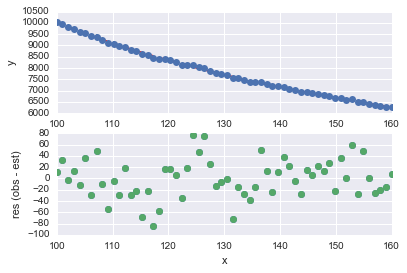

('fit', 2002626.2626262626, -1.0)


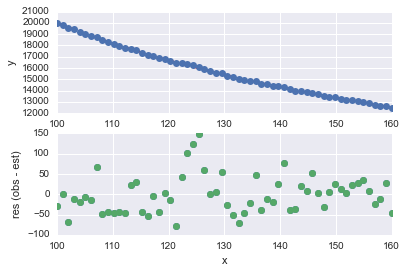

('fit', 5002525.2525252523, -1.0)


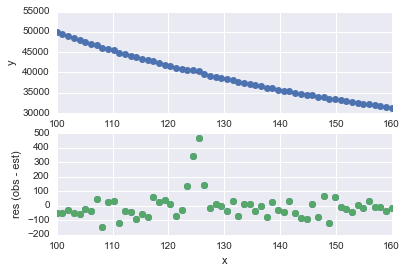

In [107]:
def fit_Higgs(filename):
    '''fit the Higgs data, 
    make the plot of data and fit, also the residue'''
    
    x, y, y_err = np.loadtxt(filename, delimiter=',', unpack=True)

    ##this needs to be set to be the same as the file name!!!
    Ntotal = int(filename[filename.find('_') + 1:filename.find('.csv')])

    def model(x, a, b):
        '''this is a very simple model, notice 
        the normalization a, correspond to N_total;
        the slope b, is constrained to be within -1 to 1;
        numerical precision matters, so be careful with stepsize
        '''
        return a * (x ** (b))

    ##repeat the fit
    step_size = 100
    a_p = np.linspace(Ntotal * 0.99, Ntotal * 1.01, step_size)
    b_p = np.linspace(-1, 1, step_size)

    chi2out = np.zeros([step_size, step_size])
    for i, a in enumerate(a_p):
        for j, b in enumerate(b_p):
            chi2out[i, j] = calc_chi2(y, y_err, model(x, a, b), 2)
            #print(chi2out[i, j])

    a_minpos, b_minpos = np.unravel_index(chi2out.argmin(), chi2out.shape)
    print("fit", a_p[a_minpos], b_p[b_minpos])

    plt.subplot(2, 1, 1)
    #print( a_p[a_minpos], b_p[b_minpos] , "chi2", chi2out[a_minpos, b_minpos])
    plt.plot(x, model(x, a_p[a_minpos], b_p[b_minpos]), 'r--', label='fit-with-bounds')
    plt.errorbar(x, y, yerr=y_err, linestyle="None", fmt='o')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(2, 1, 2)
    plt.plot(x, y - model(x, a_p[a_minpos], b_p[b_minpos]), 'o', label='fit-with-bounds')
    plt.errorbar(x, y - model(x, a_p[a_minpos], b_p[b_minpos]), linestyle="None", fmt='o')
    plt.xlabel("x")
    plt.ylabel("res (obs - est)")
    plt.show()
    
fit_Higgs(filename = "Higgs_1000000.csv")
fit_Higgs(filename = "Higgs_2000000.csv")
fit_Higgs(filename = "Higgs_5000000.csv")